# Introduction
In the previous section of [Data Exploration](#sec_2) there are quite a few things that have been observed:
* Prediction of the class involves classification
* The target class has imbalance, observed in both training and test
* Quite a few predictors have high correlation, while some are skewed or heavy tailed with outliers


In this section, we look at approaches to build our model. As the problem of prediction of two classes it is a simple classification problem, we will implement the logistic regression learning algorithm. But in order to do so we have to initially look at the predictors to make our model simpler as only accuracy is not the desired attribute of our model, simplicity of the model is also important as it would be implemented in practice. Therefore, we make a trade off with accuracy and simplicity in the model. In order to achieve a more explanable model it's very important to focus on the predictors which when targeted as part of marketing would have a customer buying the policy. In order to achieve the best result we look at different ways of selecting the correct features, as most classification learning algorithms need the right set of predictors for a lower mis-classification rate.


In [1]:
source("read_data.R")
source("prediction_summary.R")
options(warn=-1)

# Logistic Regression model with all the predictors

## Fitting the model

In [2]:


glm_model_0 <- glm(V86~.,
                    data = caravan_data, 
                    family = binomial)
summary(glm_model_0)


Call:
glm(formula = V86 ~ ., family = binomial, data = caravan_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7047  -0.3711  -0.2450  -0.1588   3.2916  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.542e+02  1.116e+04   0.023  0.98183    
V1           6.580e-02  4.624e-02   1.423  0.15468    
V2          -1.832e-01  1.927e-01  -0.951  0.34157    
V3          -2.696e-02  1.399e-01  -0.193  0.84723    
V4           2.096e-01  1.016e-01   2.063  0.03911 *  
V5          -2.767e-01  2.076e-01  -1.333  0.18247    
V6          -1.142e-01  1.069e-01  -1.068  0.28535    
V7          -1.910e-02  1.177e-01  -0.162  0.87112    
V8          -1.618e-02  1.055e-01  -0.153  0.87818    
V9          -6.817e-02  1.113e-01  -0.612  0.54024    
V10          2.310e-01  1.566e-01   1.475  0.14031    
V11          8.509e-02  1.466e-01   0.580  0.56169    
V12          1.467e-01  1.562e-01   0.939  0.34759    
V13         -8.291e-02  1.311e-

## Interpreting the model
    * The deviances have a higher number which indicates that the model is a bad fit for the data, as it uses the ordinary least squares by fitting a model based on its maximum likelihood.
    * The significance level of the predictors shows v47 as most significant, and a few more as comparatively less significant than 47 but more than most (V4,V52,V55,V59,V76,V82) based on their p-values
    * The Z-value for the variables do not show a distinctively higher magnitude to indicate the importance of a variable
    * The coeffecient estimates gives how much change in the coeffecient of a predictor is need to make an unit change in the target. In a logistic regression the coeffecient is based on the log odds of the outcome for a unit change in the variable.
    * The higher AIC value is evident as it penalises a more complex model, which is the model in our case
    * This model took 17 iterations to converge as per the Fisher scoring.



## Evaluating model
The accuracy of a classifier is based on the number of classifications. It is important to note the accuracy of the models being built.



Area under the curve: 0.5055

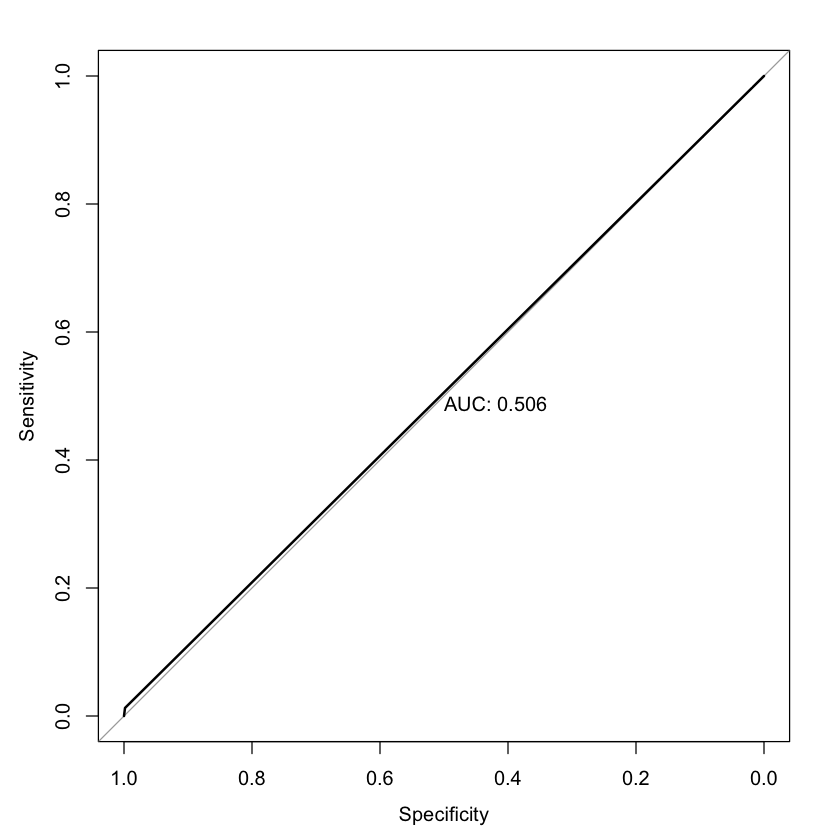

In [3]:
pred_sum_0 <- prediction_summary(glm_model_0,caravan_test, 0.5, "V86")
pred_sum_0$auc_value


### Interpreting the prediction results:
	* There is a high sensitivity and a low specificity, which imply that the True positive rate is very high as the model was able to determine the non-caravan insurance buyers, but was considerably poor in identifiying the ones that would have bought the policy
	* The accuracy gave us almost 94% as there are more 0s in the data than 1s. But for our assignment it is important to identify the customers who are more likley to buy the policy.
	* As we set the cutoff to about 50%, we assume that the likelihood of the classes are even. The prior probablity from the data is around 5-6%. This is a thing to be considered.
	* Looking at the AUC value which stands at 0.505, the model is not much effective in terms of prediction. As AUC imples the area under the curve for a classifier, it would be the criteria of judgin our model. A higher AUC value would mean a better classifier model.
	

## Find the cutoff for the maximum AUC

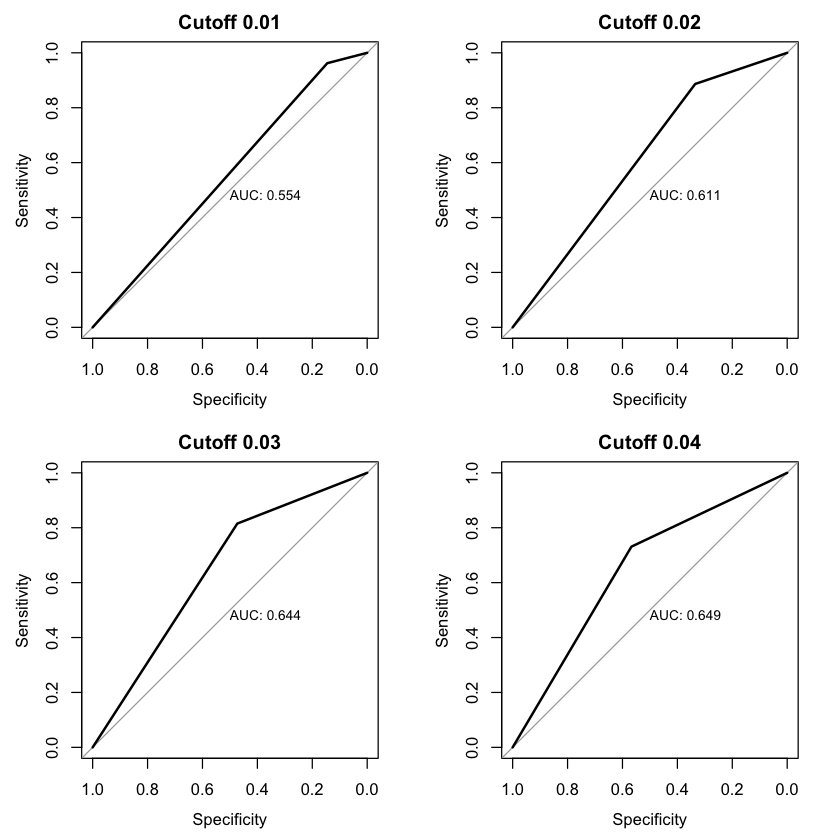

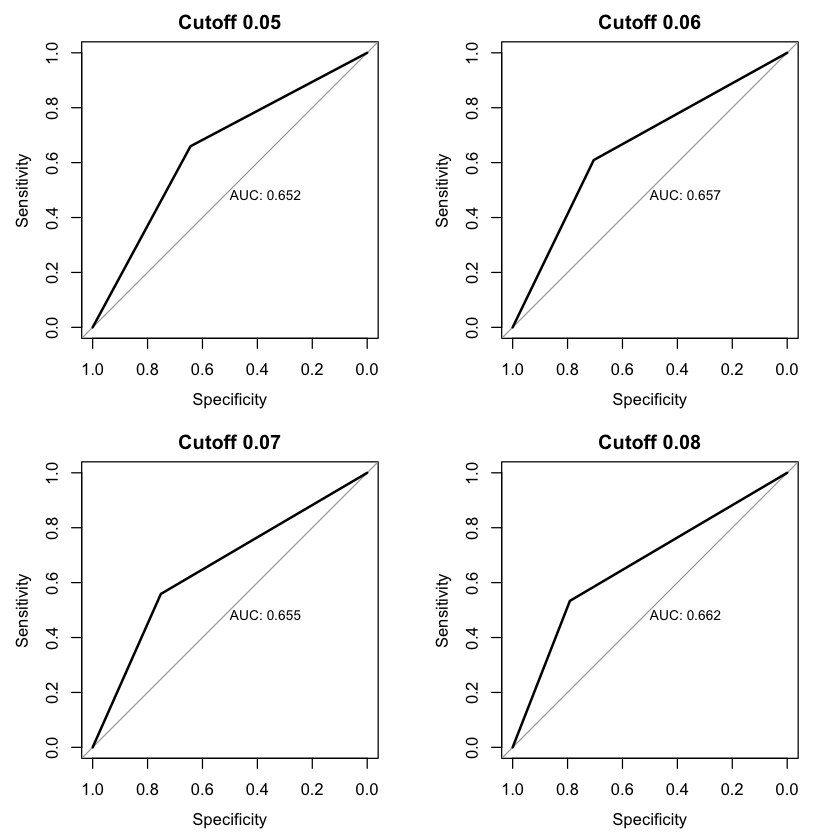

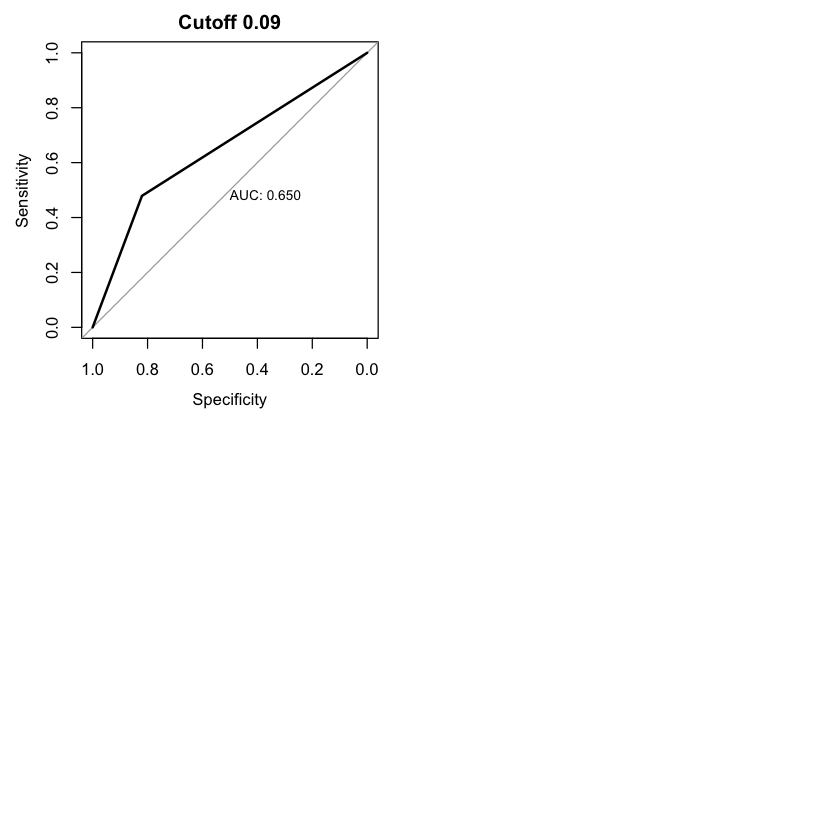

In [4]:

par(mfrow = c(2, 2))
for (cutoff in c(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09)){
    glm_prob <- predict.glm(glm_model_0,caravan_test[,-86],type="response")
    glm_predict <- rep(0,nrow(caravan_test))
    glm_predict[glm_prob>cutoff] <- 1
    roc_obj <- roc(caravan_test$V86,glm_predict)
    plot(roc_obj, print.auc=TRUE,main=paste("Cutoff",cutoff))
}


### Interpreting the above graphs:
	* We look at the different AUC curves for different cutoff boundaries for the clas probabilities. This helps us to determine that the highest area under curve lies for the cutoff of 0.06 which is surprisingly close to the prior probability value
	* This may seem unusual but its important to understand the importance of the boundary in our dataset. As the number of caravan policy buyers are very low, it can be thought of the number of people having cancer in the whole population. To predict the probable persons having cancer the true prior probability affects our knowledge of predicting the actual cancer patients, in our case the customers buying caravan policy.
	
	

#### Training prediction summary

Area under the curve: 0.7119

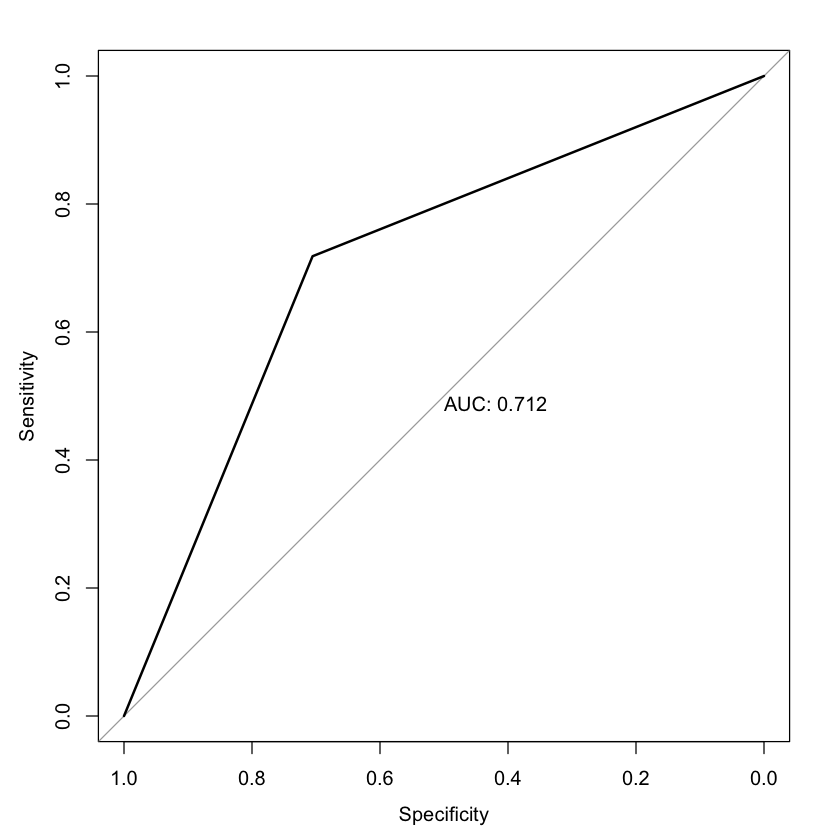

In [5]:

pred_sum_0 <- prediction_summary(glm_model_0,caravan_data, .06, "V86")
pred_sum_0$auc_value

#### Test data prediction summary

We see above that the specifity and sensitivity have similar values but the accuracy has drastically dropped as it was previously biased towards the more prevalent 0s and now it is more balanced towards the 1s. Also to note we have a higher AUC value than before, which determines that this classifier is better at classification using all the predictors and choosing the correct cutoff boundary.

Area under the curve: 0.657

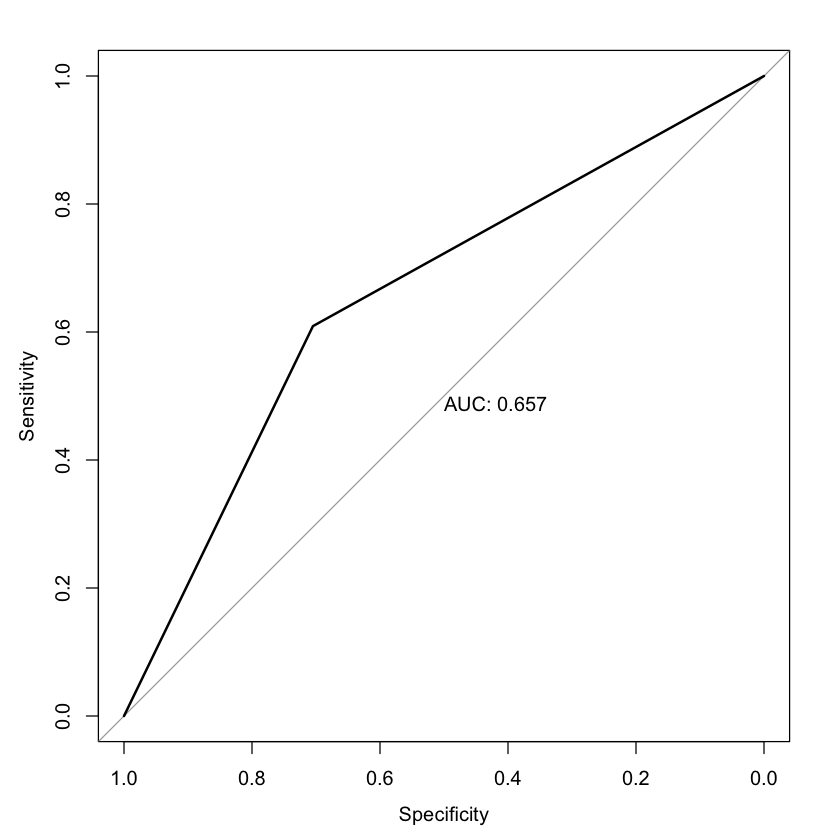

In [6]:

pred_sum_0 <- prediction_summary(glm_model_0,caravan_test, .06, "V86")
pred_sum_0$auc_value
